In [12]:
#Importing packages And libraries
import numpy as np 
import pandas as pd
from numpy import math 

In [13]:
df=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv") #Import Data

C:\Users\l001413\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
df.shape #the number of rows and columns of the Data Frame

(300698, 53)

In [15]:
df.columns #the names of all columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [17]:
df.tail() #last n rows of the Data Frame

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"
300697,30281825,03/29/2015 12:33:01 AM,03/29/2015 04:41:50 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"


In [18]:
df1=pd.DataFrame()
df1['Unique Key']=df['Unique Key']
df1['Created Date']=df['Created Date']
df1['Closed Date']=df['Closed Date']
df1['Complaint Type']=df['Complaint Type']
df1['Location Type']=df['Location Type']
df1['Status']=df['Status']
df1['Due Date']=df['Due Date']
df1['City']=df['City']
df1['Latitude']=df['Latitude']
df1['Longitude']=df['Longitude']
df1['Incident Zip']=df['Incident Zip']
df1['Descriptor']=df['Descriptor']
df1['Agency']=df['Agency']

In [19]:
print(df1.isnull().sum())

Unique Key           0
Created Date         0
Closed Date       2164
Complaint Type       0
Location Type      131
Status               0
Due Date             3
City              2614
Latitude          3540
Longitude         3540
Incident Zip      2615
Descriptor        5914
Agency               0
dtype: int64


In [20]:
import datetime as dt

In [21]:
df1['Closed Date']=pd.to_datetime(df1['Closed Date'])

In [22]:
df1['Created Date']=pd.to_datetime(df1['Created Date'])

In [23]:
df1['Closed Date'].dtype

dtype('<M8[ns]')

In [24]:
df1['Created Date'].dtype

dtype('<M8[ns]')

In [25]:
df1['Request Closing Time']=df1['Closed Date']-df1['Created Date']

In [26]:
df1['Request Closing Time'].dtype

dtype('<m8[ns]')

In [27]:
df1['Request Closing Time'].head()

0   00:55:15
1   01:26:16
2   04:51:31
3   07:45:14
4   03:27:02
Name: Request Closing Time, dtype: timedelta64[ns]

In [29]:
def converttohours(t):
    days=t.days
    hours=round(t.seconds/3600,2)
    result=(days*24)+hours
    return (result)

In [30]:
df1['Request Closing Time hrs']=df1['Request Closing Time'].apply(converttohours)

In [31]:
df1['Request Closing Time hrs']

0         0.92
1         1.44
2         4.86
3         7.75
4         3.45
          ... 
300693     NaN
300694    2.01
300695    3.12
300696    4.09
300697    4.15
Name: Request Closing Time hrs, Length: 300698, dtype: float64

In [32]:
def category(hrs):
    if (math.isnan(hrs)):
        return 'unspecified'
    elif (hrs<2.0):
        return 'Fast'
    elif(4.0>hrs>=2.0):
        return 'Acceptable'
    elif(6.0>hrs>=4.0):
        return 'Slow'
    else:
        return 'Very Slow'

In [33]:
df1['Request Closing Time Category']=df1['Request Closing Time hrs'].apply(category)

In [34]:
df1['Request Closing Time Category'].head()

0          Fast
1          Fast
2          Slow
3     Very Slow
4    Acceptable
Name: Request Closing Time Category, dtype: object

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

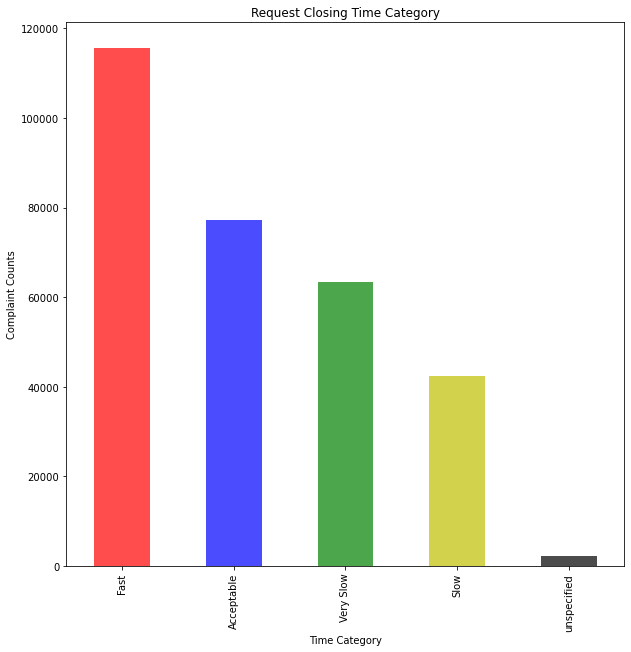

In [36]:
df1['Request Closing Time Category'].value_counts().plot(kind='bar',color=list('rbgykmc'),alpha=0.7,figsize=(10,10))
plt.title("Request Closing Time Category")
plt.xlabel('Time Category')
plt.ylabel('Complaint Counts')
plt.show()

In [37]:
month=pd.Series({1:'Jan',2:"Feb",3:'Mar',4:'Apr',5:"May",6:"June",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
month

1      Jan
2      Feb
3      Mar
4      Apr
5      May
6     June
7     July
8      Aug
9      Sep
10     Oct
11     Nov
12     Dec
dtype: object

In [38]:
month[df1['Created Date'][0].month]

'Dec'

In [39]:
def month_text(mon):
    text=mon.month
    return month[text]

In [40]:
df1['Created Month']=df1['Created Date'].apply(month_text)

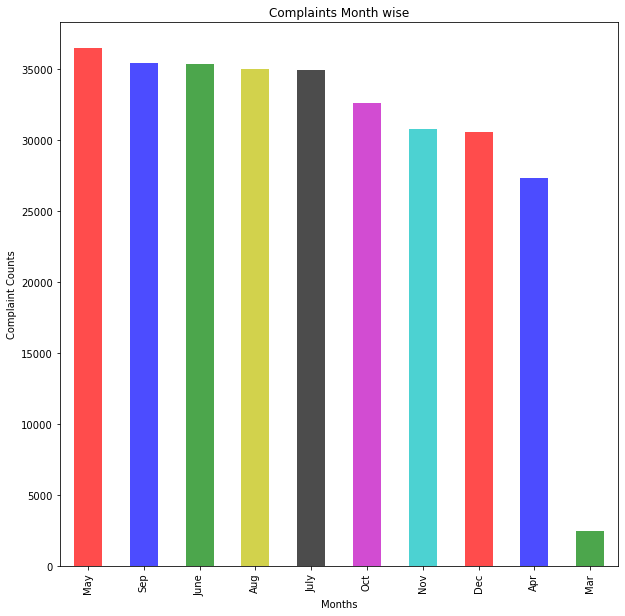

In [41]:
df1['Created Month'].value_counts().plot(kind='bar',color=list('rbgykmc'),alpha=0.7,figsize=(10,10))
plt.title("Complaints Month wise")
plt.xlabel('Months')
plt.ylabel('Complaint Counts')
plt.show()

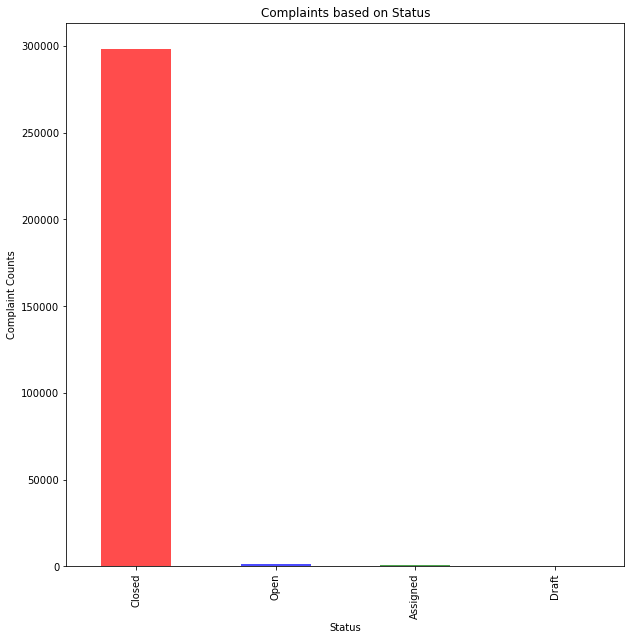

In [42]:
df1['Status'].value_counts().plot(kind='bar',color=list('rbgykmc'),alpha=0.7,figsize=(10,10))
plt.title("Complaints based on Status")
plt.xlabel('Status')
plt.ylabel('Complaint Counts')
plt.show()

In [43]:
df1['City'].isnull().sum()

2614

In [44]:
df1['City'].fillna('Not Available', inplace=True)

In [45]:
df1['City'].isnull().sum()

0

In [54]:
df1_city_grouped=df1.groupby(['City','Complaint Type'])
df1_city_grouped

In [52]:
df1_city_grouped_mean=df1_city_grouped.mean()
df1_city_grouped_mean

Unique Key   Latitude  Longitude  \
City     Complaint Type                                                
ARVERNE  Animal Abuse             3.135572e+07  40.592951 -73.791443   
         Blocked Driveway         3.134039e+07  40.592581 -73.794535   
         Derelict Vehicle         3.125991e+07  40.591295 -73.795691   
         Disorderly Youth         3.111913e+07  40.594667 -73.795390   
         Drinking                 3.048840e+07  40.592907 -73.795151   
...                                        ...        ...        ...   
Woodside Blocked Driveway         3.120760e+07  40.758791 -73.906289   
         Derelict Vehicle         3.091450e+07  40.755980 -73.906659   
         Illegal Parking          3.084117e+07  40.759195 -73.905961   
         Noise - Commercial       3.043185e+07  40.759516 -73.904993   
         Noise - Street/Sidewalk  3.059080e+07  40.761379 -73.904922   

                                  Incident Zip  Request Closing Time hrs  
City     Complaint Type                                                   
ARVERNE  Animal Abuse                  11692.0                  2.153158  
         Blocked Driveway              11692.0                  2.526000  
         Derelict Vehicle              11692.0                  2.968889  
         Disorderly Youth              11692.0                  3.595000  
         Drinking                      11692.0                  0.240000  
...                                        ...                       ...  
Woodside Blocked Driveway              11377.0                  6.405455  
         Derelict Vehicle              11377.0                  4.965000  
         Illegal Parking               11377.0                  5.219500  
         Noise - Commercial            11377.0                  2.390000  
         Noise - Street/Sidewalk       11377.0                  3.410000  

[782 rows x 5 columns]

In [53]:
df1_city_grouped_mean=df1_city_grouped.mean()['Request Closing Time hrs']
df1_city_grouped_mean

City      Complaint Type         
ARVERNE   Animal Abuse               2.153158
          Blocked Driveway           2.526000
          Derelict Vehicle           2.968889
          Disorderly Youth           3.595000
          Drinking                   0.240000
                                       ...   
Woodside  Blocked Driveway           6.405455
          Derelict Vehicle           4.965000
          Illegal Parking            5.219500
          Noise - Commercial         2.390000
          Noise - Street/Sidewalk    3.410000
Name: Request Closing Time hrs, Length: 782, dtype: float64

In [151]:
df1_grouped=df1.groupby(['City','Complaint Type']).agg({'Request Closing Time hrs':'mean'})

In [153]:
df1_grouped

Request Closing Time hrs
City     Complaint Type                                   
ARVERNE  Animal Abuse                             2.153158
         Blocked Driveway                         2.526000
         Derelict Vehicle                         2.968889
         Disorderly Youth                         3.595000
         Drinking                                 0.240000
...                                                    ...
Woodside Blocked Driveway                         6.405455
         Derelict Vehicle                         4.965000
         Illegal Parking                          5.219500
         Noise - Commercial                       2.390000
         Noise - Street/Sidewalk                  3.410000

[782 rows x 1 columns]

In [161]:
df1_grouped.isnull().sum()

Request Closing Time hrs    4
dtype: int64

In [162]:
df1_grouped.count()

Request Closing Time hrs    778
dtype: int64

In [166]:
df1_grouped_withoutnull=df1_grouped.dropna()

In [168]:
df1_grouped_withoutnull.isnull().sum()

Request Closing Time hrs    0
dtype: int64

In [157]:
df1_grouped_sorted=df1_grouped_withoutnull.sort_values(['City','Request Closing Time hrs'])

In [158]:
df1_grouped_sorted

Request Closing Time hrs
City     Complaint Type                                   
ARVERNE  Drinking                                 0.240000
         Vending                                  0.480000
         Urinating in Public                      0.690000
         Panhandling                              1.030000
         Noise - Park                             1.285000
...                                                    ...
Woodside Noise - Commercial                       2.390000
         Noise - Street/Sidewalk                  3.410000
         Derelict Vehicle                         4.965000
         Illegal Parking                          5.219500
         Blocked Driveway                         6.405455

[778 rows x 1 columns]

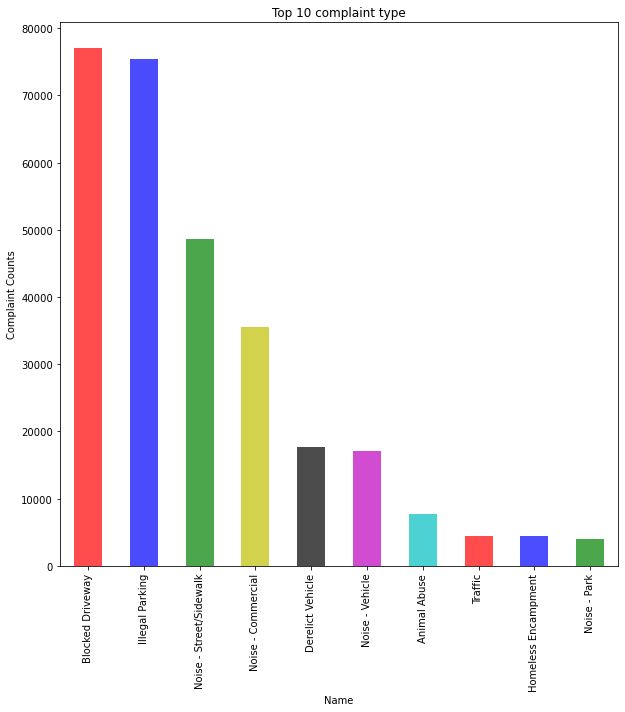

In [170]:
df1['Complaint Type'].value_counts()[:10].plot(kind='bar',color=list('rbgykmc'),alpha=0.7,figsize=(10,10))
plt.title("Top 10 complaint type")
plt.xlabel('Name')
plt.ylabel('Complaint Counts')
plt.show()

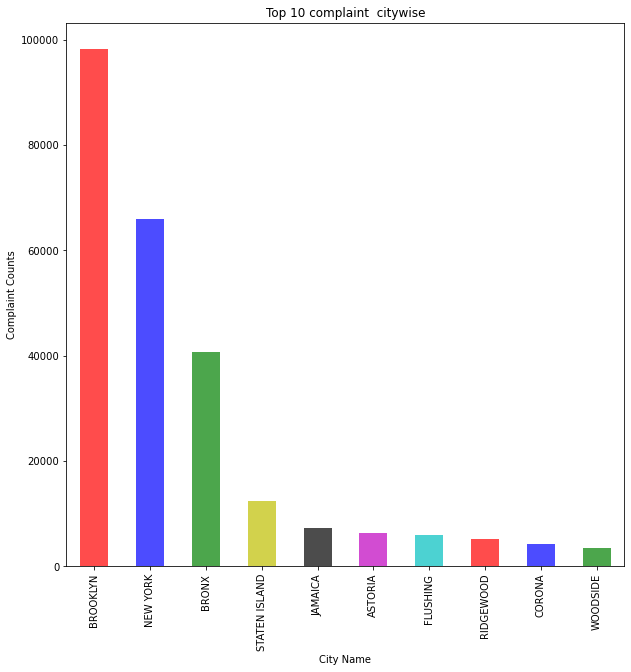

In [171]:
df1['City'].value_counts()[:10].plot(kind='bar',color=list('rbgykmc'),alpha=0.7,figsize=(10,10))
plt.title("Top 10 complaint  citywise")
plt.xlabel('City Name')
plt.ylabel('Complaint Counts')
plt.show()

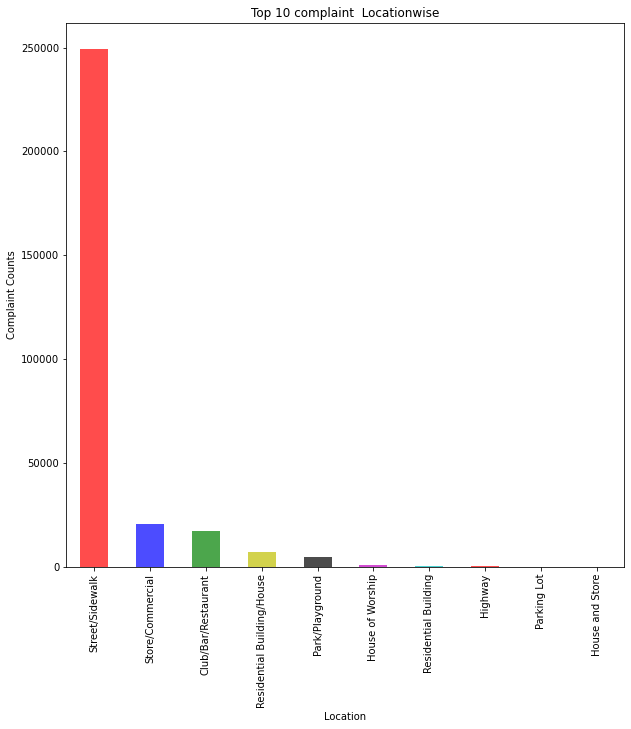

In [172]:
df1['Location Type'].value_counts()[:10].plot(kind='bar',color=list('rbgykmc'),alpha=0.7,figsize=(10,10))
plt.title("Top 10 complaint  Locationwise")
plt.xlabel('Location')
plt.ylabel('Complaint Counts')
plt.show()

In [173]:
df2=df1.dropna()
df2.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Status,Due Date,City,Latitude,Longitude,Incident Zip,Descriptor,Agency,Request Closing Time,Request Closing Time hrs,Request Closing Time Category,Created Month
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Street/Sidewalk,Closed,01-01-16 7:59,NEW YORK,40.865682,-73.923501,10034.0,Loud Music/Party,NYPD,00:55:15,0.92,Fast,Dec
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,Street/Sidewalk,Closed,01-01-16 7:59,ASTORIA,40.775945,-73.915094,11105.0,No Access,NYPD,01:26:16,1.44,Fast,Dec
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,Street/Sidewalk,Closed,01-01-16 7:59,BRONX,40.870325,-73.888525,10458.0,No Access,NYPD,04:51:31,4.86,Slow,Dec
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Street/Sidewalk,Closed,01-01-16 7:57,BRONX,40.835994,-73.828379,10461.0,Commercial Overnight Parking,NYPD,07:45:14,7.75,Very Slow,Dec
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Street/Sidewalk,Closed,01-01-16 7:56,ELMHURST,40.733060,-73.874170,11373.0,Blocked Sidewalk,NYPD,03:27:02,3.45,Acceptable,Dec


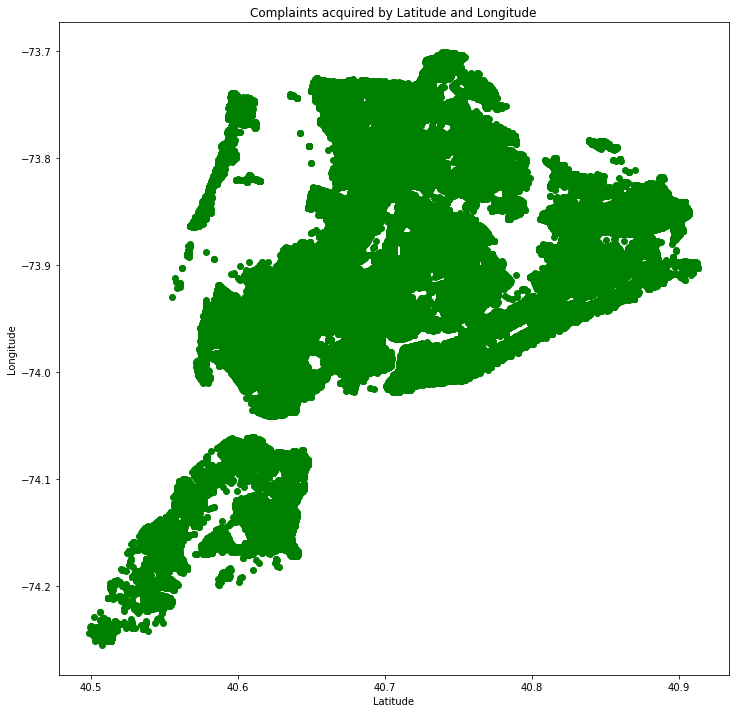

In [178]:
plt.figure(figsize=(12,12))
plt.scatter(df2['Latitude'],df2['Longitude'],color='g')
plt.title('Complaints acquired by Latitude and Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [179]:
df2['hour']=df2['Created Date'].dt.hour
df2['Day']=df2['Created Date'].dt.day

<ipython-input-179-3a3ca2dc203f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hour']=df2['Created Date'].dt.hour
<ipython-input-179-3a3ca2dc203f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Day']=df2['Created Date'].dt.day


In [180]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
l2=LabelEncoder()
l3=LabelEncoder()
l4=LabelEncoder()
df2['City_n']=l1.fit_transform(df2['City'])
df2['Created Month_n']=l2.fit_transform(df2['Created Month'])
df2['Complaint Type_n']=l3.fit_transform(df2['Complaint Type'])
df2['Location Type_n']=l4.fit_transform(df2['Location Type'])

<ipython-input-180-21ec5e2f01b6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['City_n']=l1.fit_transform(df2['City'])
<ipython-input-180-21ec5e2f01b6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Created Month_n']=l2.fit_transform(df2['Created Month'])
<ipython-input-180-21ec5e2f01b6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [181]:
df2.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Status,Due Date,City,Latitude,Longitude,...,Request Closing Time,Request Closing Time hrs,Request Closing Time Category,Created Month,hour,Day,City_n,Created Month_n,Complaint Type_n,Location Type_n
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Street/Sidewalk,Closed,01-01-16 7:59,NEW YORK,40.865682,-73.923501,...,00:55:15,0.92,Fast,Dec,23,31,33,2,10,11
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,Street/Sidewalk,Closed,01-01-16 7:59,ASTORIA,40.775945,-73.915094,...,01:26:16,1.44,Fast,Dec,23,31,1,2,1,11
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,Street/Sidewalk,Closed,01-01-16 7:59,BRONX,40.870325,-73.888525,...,04:51:31,4.86,Slow,Dec,23,31,6,2,1,11
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Street/Sidewalk,Closed,01-01-16 7:57,BRONX,40.835994,-73.828379,...,07:45:14,7.75,Very Slow,Dec,23,31,6,2,6,11
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Street/Sidewalk,Closed,01-01-16 7:56,ELMHURST,40.733060,-73.874170,...,03:27:02,3.45,Acceptable,Dec,23,31,13,2,6,11


In [187]:
x=df2[['City_n','Created Month_n','Location Type_n','hour','Latitude','Longitude']]
y=df2[['Complaint Type_n']]

In [188]:
from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression()

In [189]:
from sklearn.model_selection import train_test_split

In [191]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [193]:
logReg.fit(x_train,y_train)

C:\Users\l001413\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\l001413\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [194]:
logReg.score(x_train,y_train)*100

41.33586160462784

In [198]:
y_pred=logReg.predict(x_test)

In [199]:
from sklearn.metrics import confusion_matrix

In [200]:
conf_matrix=confusion_matrix(y_pred,y_test)

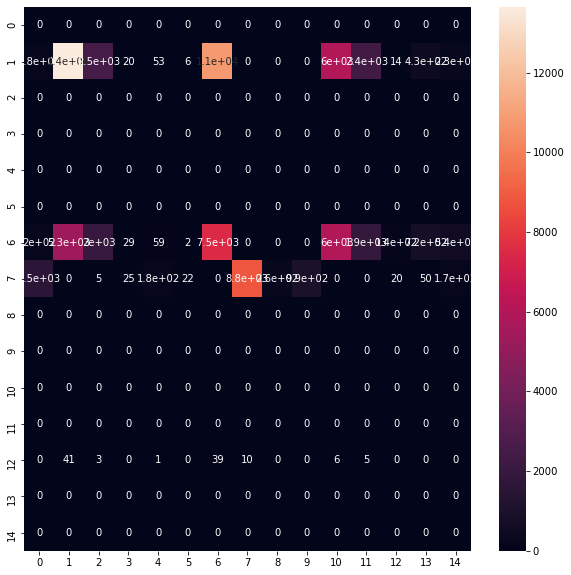

In [212]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(conf_matrix,annot=True)

In [213]:
from sklearn.metrics import accuracy_score

In [214]:
acc=accuracy_score(y_pred,y_test)
acc*100 

41.206133721729095